## Lab. 12

### Solve the following problem using Genetic Algorithms:


Problem: Weighted N-Queen Problem


You are given an N×N chessboard, and each cell of the board has an associated weight. Your task is to find a valid placement of N queens such that the total weight of the queens is maximized, and no two queens threaten each other.





In the traditional N-Queen Problem, the goal is to place N queens on an N×N chessboard in such a way that no two queens threaten each other. In this variation, we introduce weights to the queens and aim to find a placement that maximizes the total weight of the queens while satisfying the constraint of non-threatening positions.


Constraints:

1. There should be exactly one queen in each row and each column.
2. No two queens should be placed in the same diagonal, i.e., they should not threaten each other.
3. The placement should maximize the total weight of the queens.


Representation:

Use a permutation-based representation. Each permutation represents the column position of the queen for each row. 

For example, if N=4, a valid permutation [2, 4, 1, 3] indicates that the queen in the first row is placed in column 2, the queen in the second row is placed in column 4, and so on.


Genetic Algorithm Steps:

1. *Initialization*: Generate an initial population of permutations randomly.

2. *Fitness Evaluation*: Evaluate the fitness of each permutation by calculating the total weight of the queens while considering the non-threatening positions.

3. *Selection*: Select a subset of permutations from the population based on their fitness, using selection techniques like tournament selection or roulette wheel selection.

4. *Crossover*: Perform crossover (recombination) on the selected permutations to create new offspring permutations.

5. *Mutation*: Introduce random changes (mutations) in the offspring permutations to maintain diversity in the population.

6. *Fitness Evaluation for the new individuals*: Evaluate the fitness of the new population.

7. *Form the new population*: Select the surviving individuals based on scores, with chances direct proportional with their performance.

8. Repeat steps 3-7 for a certain number of generations or until a termination condition is met (e.g., a maximum number of iterations or a satisfactory solution is found).


9. *Termination*: Return the best-performing individual (permutation) found as the solution to the problem.

Note: The fitness function used in this problem should calculate the total weight of the queens based on the positions specified by the permutation. Additionally, the fitness function should penalize solutions that violate the non-threatening constraint by assigning a lower fitness score to such permutations.

Position of queens  [4, 7, 5, 2, 6, 1, 7, 4]
Fitness value  2


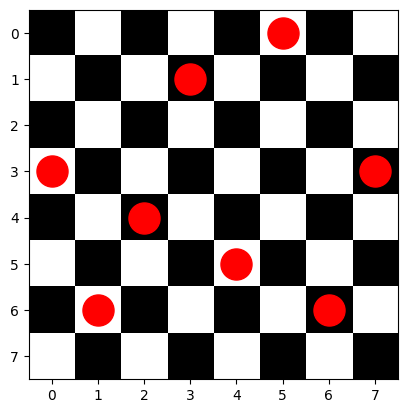

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import random
fitness_cache = {}

def tournament_selection(population, fitness_values, tournament_size):
    # Select a random subset of individuals for the tournament
    tournament = random.sample(list(zip(population, fitness_values)), tournament_size)
    return min(tournament, key=lambda x: x[1])[0] # Return the individual with the lowest fitness value
def fitness_function(individual):
    n = len(individual)
    collisions = 0
    
    if tuple(individual) in fitness_cache:
        return fitness_cache[tuple(individual)]
    
    for i in range(n):
        for j in range(i+1, n):
            if individual[i] == individual[j] or abs(individual[i] - individual[j]) == j - i:
                collisions += 1
    fitness_cache[tuple(individual)] = collisions
    return collisions

def mutation(individual, mutation_rate):
    if random.random() > mutation_rate:
        return individual
    n = len(individual)
    individual[random.randint(0, n-1)] = random.randint(1, n)
    return individual

def crossover(parent1, parent2):
    n = len(parent1)
    crossover_point = random.randint(1, n-1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def roulette_wheel_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    normalized_fitness_values = [fv / total_fitness for fv in fitness_values]
    selected = random.choices(population, weights=normalized_fitness_values, k=1)
    return selected[0]



        
        
def initialize_population(population_size, nr_of_queens):
    population = []
    for i in range(population_size):
        permutation = [random.randint(1, nr_of_queens) for _ in range(nr_of_queens)]
        population.append(permutation)
    return population

    
    
def genetic_algorithm(population_size, nr_of_queens, mutation_rate, generations):
    population = initialize_population(population_size, nr_of_queens)
    for generation in range(generations):
        fitness_values = [fitness_function(individual) for individual in population]
        parent1 = roulette_wheel_selection(population, fitness_values)
        parent2 = roulette_wheel_selection(population, fitness_values)
        #parent1 = population[random.randint(0, population_size - 1)]
        #parent2 = population[random.randint(0, population_size - 1)]
        #parent1 = tournament_selection(population, [fitness_function(individual) for individual in population], 10)
        #parent2 = tournament_selection(population, [fitness_function(individual) for individual in population], 10)
        
        if parent2 == parent1:
            continue
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        
        parent1Fitness = fitness_function(parent1)
        parent2Fitness = fitness_function(parent2)
        offspring1Fitness = fitness_function(child1)
        offspring2Fitness = fitness_function(child2)
        
        betterOffspringFitness = min(offspring1Fitness, offspring2Fitness)
        worseOffspringFitness = max(offspring1Fitness, offspring2Fitness)
        
       
        
        betterOffspring = child1 if offspring1Fitness < offspring2Fitness else child2
        if betterOffspringFitness == 0:
            return [betterOffspring] + population
        
        worseParent = parent1 if parent1Fitness > parent2Fitness else parent2
        
        betterParentFitness = parent1Fitness if parent1Fitness < parent2Fitness else parent2Fitness
        worseParentFitness = parent2Fitness if parent1Fitness < parent2Fitness else parent1Fitness
                
        if betterParentFitness < worseOffspringFitness:
            population[population.index(parent1)] = child1
            population[population.index(parent2)] = child2
        elif worseParentFitness < betterOffspringFitness:
            population[population.index(worseParent)] = betterOffspring
            
    return population
    

pop = genetic_algorithm(1000, 8, 0.2, (10 ** 4))
fitness_values = [fitness_function(individual) for individual in pop]
best_individual = pop[fitness_values.index(min(fitness_values))]
print("Position of queens ", best_individual)
print("Fitness value ", fitness_function(best_individual))
    
    
def draw_chessboard(queens: list[int], board_size: int = 8):
    queens = [queen - 1 for queen in queens]
    chessboard = np.zeros((board_size, board_size))
    chessboard[1::2, ::2] = 1
    chessboard[::2, 1::2] = 1

    
    plt.imshow(chessboard, cmap='gray')

    # Place the queens on the board
    column = 0
    for row in queens:
        plt.scatter(column, row, color='red', s=500)  # Draw a red circle for the queen
        column += 1

    plt.show()
    
    
draw_chessboard(best_individual, 8)



In [4]:
from matplotlib import pyplot as plt
import numpy as np
import random
fitness_cache = {}
def fitness_function(individual):
    n = len(individual)
    collisions = 0
    
    if tuple(individual) in fitness_cache:
        return fitness_cache[tuple(individual)]
    
    for i in range(n):
        for j in range(i+1, n):
            if individual[i] == individual[j] or abs(individual[i] - individual[j]) == j - i:
                collisions += 1
    fitness_cache[tuple(individual)] = collisions
    return collisions

def mutation(individual, mutation_rate):
    if random.random() > mutation_rate:
        return individual
    n = len(individual)
    individual[random.randint(0, n-1)] = random.randint(1, n)
    return individual

def crossover(parent1, parent2):
    n = len(parent1)
    crossover_point = random.randint(1, n-1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def roulette_wheel_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    normalized_fitness_values = [fv / total_fitness for fv in fitness_values]
    selected = random.choices(population, weights=normalized_fitness_values, k=1)
    return selected[0]



        
        
def initialize_population(population_size, nr_of_queens):
    population = []
    for i in range(population_size):
        permutation = [random.randint(1, nr_of_queens) for _ in range(nr_of_queens)]
        population.append(permutation)
    return population

    
    
def genetic_algorithm(population_size, nr_of_queens, mutation_rate, generations):
    population = initialize_population(population_size, nr_of_queens)
    for generation in range(generations):
        fitness_values = [fitness_function(individual) for individual in population]
        parent1 = roulette_wheel_selection(population, fitness_values)
        parent2 = roulette_wheel_selection(population, fitness_values)
        #parent1 = population[random.randint(0, population_size - 1)]
        #parent2 = population[random.randint(0, population_size - 1)]
        
        if parent2 == parent1:
            continue
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        
        parent1Fitness = fitness_function(parent1)
        parent2Fitness = fitness_function(parent2)
        offspring1Fitness = fitness_function(child1)
        offspring2Fitness = fitness_function(child2)
        
        betterOffspringFitness = min(offspring1Fitness, offspring2Fitness)
        worseOffspringFitness = max(offspring1Fitness, offspring2Fitness)
        
       
        
        betterOffspring = child1 if offspring1Fitness < offspring2Fitness else child2
        if betterOffspringFitness == 0:
            return [betterOffspring] + population
        
        worseParent = parent1 if parent1Fitness > parent2Fitness else parent2
        
        betterParentFitness = parent1Fitness if parent1Fitness < parent2Fitness else parent2Fitness
        worseParentFitness = parent2Fitness if parent1Fitness < parent2Fitness else parent1Fitness
                
        if betterParentFitness < worseOffspringFitness:
            population[population.index(parent1)] = child1
            population[population.index(parent2)] = child2
        elif worseParentFitness < betterOffspringFitness:
            population[population.index(worseParent)] = betterOffspring
            
    return population
    

pop = genetic_algorithm(1000, 30, 0.2, (10 ** 5)*7)
fitness_values = [fitness_function(individual) for individual in pop]
best_individual = pop[fitness_values.index(min(fitness_values))]
print("Position of queens ", best_individual)
print("Fitness value ", fitness_function(best_individual))
    

def draw_chessboard(queens: list[int], board_size: int = 8):
    queens = [queen - 1 for queen in queens]
    chessboard = np.zeros((board_size, board_size))
    chessboard[1::2, ::2] = 1
    chessboard[::2, 1::2] = 1

    
    plt.imshow(chessboard, cmap='gray')

    # Place the queens on the board
    column = 0
    for row in queens:
        plt.scatter(row, column, color='red', s=500)  # Draw a red circle for the queen
        column += 1

    plt.show()
    
    
draw_chessboard(best_individual, 8)    




KeyboardInterrupt: 